### This script entitled to output the box plot of the pattern correlation of the simulation and observations, overlapped with the MMEM, SMILE ensemble pattern versus observations

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
# def read_correlations(file_path):
#     with open(file_path, 'r') as file:
#         # Split the file content by newlines and convert each piece to a float
#         return [float(correlation) for correlation in file.read().splitlines()]

In [ ]:
def read_correlations(file_path):
    correlations = {
        '10-year': [],
        '30-year': [],
        '60-year': []
    }
    
    current_period = '10-year'  # Initialize with the first period

    with open(file_path, 'r') as file:
        for line in file:
            try:
                # Try to convert the line into a float and add it to the current period list
                correlations[current_period].append(float(line.strip()))
            except ValueError:
                # If it fails, it's probably a header line; update the current period based on the header
                if '10-year' in line:
                    current_period = '10-year'
                elif '30-year' in line:
                    current_period = '30-year'
                elif '60-year' in line:
                    current_period = '60-year'
                # If it's not a header, the line is skipped

    return correlations


In [ ]:
# input the pattern correlation of each models: single realization and the ensemble mean
dir_in = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure2/'

In [ ]:
CanESM5_run_ens_corr = read_correlations(dir_in + 'CanESM5/pattern_correlations.txt')
IPSL_run_ens_corr = read_correlations(dir_in + 'IPSL/pattern_correlations.txt')
EC_Earth_run_ens_corr = read_correlations(dir_in + 'EC_Earth/pattern_correlations.txt')
ACCESS_run_ens_corr = read_correlations(dir_in + 'ACCESS/pattern_correlations.txt')
MPI_ESM_run_ens_corr = read_correlations(dir_in + 'MPI_ESM/pattern_correlations.txt')
MIROC6_run_ens_corr = read_correlations(dir_in + 'MIROC6/pattern_correlations.txt')

In [ ]:
CanESM5_run_ens_corr

In [ ]:
MMEM_corr = {'10-year': [0.82], '30-year': [0.86], '60-year': [0.87]}

In [ ]:
type(MMEM_corr)

In [ ]:
MMEM_corr

In [ ]:
# Input the MMEM pattern correlation
ens_obs_corr = read_correlations('/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure6_Forced/pattern_correlations_trend_of_meanENS_Obs.txt')
ens_obs_corr

In [ ]:
# remove the first element of the list in the dictionary ens_obs_corr
ens_obs_corr.keys()

In [ ]:
merged_data = {}
for key in ens_obs_corr.keys():
    merged_data[key] = ens_obs_corr[key][2:]
    # merged_data[key].extend([model[1][key][0] for model in models_data])
    merged_data[key].append(MMEM_corr[key][0])

In [ ]:
merged_data

In [ ]:
merged_data['10-year'][5]

In [ ]:
ensemble_data ={
    'CanESM5': {'10-year': merged_data['10-year'][5], '30-year': merged_data['30-year'][5], '60-year': merged_data['60-year'][5]},
    'IPSL': {'10-year': merged_data['10-year'][4], '30-year': merged_data['30-year'][4], '60-year': merged_data['60-year'][4]},
    'EC-Earth': {'10-year': merged_data['10-year'][3], '30-year': merged_data['30-year'][3], '60-year': merged_data['60-year'][3]},
    'ACCESS': {'10-year': merged_data['10-year'][2], '30-year': merged_data['30-year'][2], '60-year': merged_data['60-year'][2]},
    'MPI-ESM': {'10-year': merged_data['10-year'][1], '30-year': merged_data['30-year'][1], '60-year': merged_data['60-year'][1]},
    'MIROC6': {'10-year': merged_data['10-year'][0], '30-year': merged_data['30-year'][0], '60-year': merged_data['60-year'][0]}
}
models_position = np.arange(len(ensemble_data))

In [ ]:
models_data = {
    'CanESM5': CanESM5_run_ens_corr,
    'IPSL': IPSL_run_ens_corr,
    'EC-Earth': EC_Earth_run_ens_corr,
    'ACCESS': ACCESS_run_ens_corr,
    'MPI-ESM': MPI_ESM_run_ens_corr,
    'MIROC6': MIROC6_run_ens_corr,
    'MMEM': MMEM_corr
}

In [ ]:
# Translate the pattern correlation into a list
# models_data = [
#     ('MMEM', MMEM_corr),
#     ('CanESM5', CanESM5_run_ens_corr),
#     ('IPSL', IPSL_run_ens_corr),
#     ('EC_Earth', EC_Earth_run_ens_corr),
#     ('ACCESS', ACCESS_run_ens_corr),
#     ('MPI_ESM', MPI_ESM_run_ens_corr),
#     ('MIROC6', MIROC6_run_ens_corr)
# ]
# models_position = np.arange(len(models_data))

In [ ]:
time_periods = ['10-year', '30-year', '60-year']
# define the colors sets for the models
# Set up colors for each model with gradients for each time period
# # three color gradient
# model_palette = {
#     'CanESM5': ['#551f33', '#66253d', '#772b47'],  
#     'IPSL': ['#a2969a','#CBBBC1', '#7a7074'],     
#     'EC_Earth': ['#BD4146', '#e34e54', '#ff5b62'],  
#     'ACCESS': ['#b69296','#E4B7BC', '#896e71'],    
#     'MPI_ESM': ['#d4b27e','#ECC68C', '#ffda9a'],   
#     'MIROC6': ['#dccdb4','#F5E4C8', '#fffbdc']    
# }
# model_palette = {
#     'MMEM':['#7570b3','#d95f02', '#1b9e77'],
#     'CanESM5': ['#7570b3','#d95f02', '#1b9e77'],   
#     'IPSL': ['#7570b3','#d95f02', '#1b9e77'], 
#     'EC_Earth': ['#7570b3','#d95f02', '#1b9e77'], 
#     'ACCESS': ['#7570b3','#d95f02', '#1b9e77'],    
#     'MPI_ESM': ['#7570b3','#d95f02', '#1b9e77'],   
#     'MIROC6': ['#7570b3','#d95f02', '#1b9e77'], 
# }

In [ ]:
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size']       = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize']  = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = False
plt.rcParams['ytick.right']         = False
plt.rcParams['xtick.bottom']        = True
# set the ticker length
plt.rcParams['xtick.major.size']    = 8
plt.rcParams['xtick.major.width']   = 2.5
plt.rcParams['ytick.major.size']    = 8
plt.rcParams['ytick.major.width']   = 2.5
# set the frame width
plt.rcParams['axes.linewidth']      = 2.5
# set the legend
plt.rcParams['legend.fontsize']     = 16
plt.rcParams['legend.frameon']      = False
plt.rcParams['legend.handlelength'] = 0
plt.rcParams['savefig.transparent'] = True # save the figure with a transparent background
plt.rcParams['pdf.fonttype'] = 42 # embed the fonts in the pdf file
# x = np.arange(1850, 2015, 1)

In [ ]:
long_data = []

# Loop through the dictionary and append each data point as a row in the list
for model, correlations_dict in models_data.items():
    for time_period, correlations in correlations_dict.items():
        for correlation in correlations:
            long_data.append({
                'Model': model,
                'Time Period': time_period,
                'Correlation': correlation
            })

# Convert the list to a DataFrame
long_df = pd.DataFrame(long_data)

In [ ]:
long_df

In [ ]:
# # blue, orange, green
# model_palette = {
#     'MMEM': ['#f16c23','#2b6a99', '#1b7c3d'],
#     'CanESM5': ['#f16c23','#2b6a99', '#1b7c3d'],   
#     'IPSL': ['#f16c23','#2b6a99', '#1b7c3d'], 
#     'EC_Earth': ['#f16c23','#2b6a99', '#1b7c3d'], 
#     'ACCESS': ['#f16c23','#2b6a99', '#1b7c3d'],    
#     'MPI_ESM': ['#f16c23','#2b6a99', '#1b7c3d'],   
#     'MIROC6': ['#f16c23','#2b6a99', '#1b7c3d'], 
# }

In [ ]:
# # input the subplots of the pattern correlation of the single realization forced correlation with observations' forced trend pattern
# # subplot b: pattern correlation of the single realization forced correlation with observations' forced trend pattern
# # input the pattern correlation of each models: single realization and the ensemble mean
# CanESM5_run_obs_corr = read_correlations(dir_in + 'CanESM5/obsForced_CanESM5forced_pattern_correlations.txt')
# IPSL_run_obs_corr = read_correlations(dir_in + 'IPSL/obsForced_vs_IPSLforced_pattern_correlations.txt')
# EC_Earth_run_obs_corr = read_correlations(dir_in + 'EC_Earth/obsForced_EC_Earthforced_pattern_correlations.txt')
# ACCESS_run_obs_corr = read_correlations(dir_in + 'ACCESS/obsForced_ACCESSforced_pattern_correlations.txt')
# MPI_ESM_run_obs_corr = read_correlations(dir_in + 'MPI_ESM/obsForced_MPI_ESMforced_pattern_correlations.txt')
# MIROC6_run_obs_corr = read_correlations(dir_in + 'MIROC6/obsForced_MIROC6forced_pattern_correlations.txt')

In [ ]:
unforced_CanESM5_run_obs_corr = read_correlations(dir_in + 'CanESM5/pattern_correlations_unforced_STD.txt')
unforced_IPSL_run_obs_corr = read_correlations(dir_in + 'IPSL/pattern_correlations_unforced_STD.txt')
unforced_EC_Earth_run_obs_corr = read_correlations(dir_in + 'EC_Earth/pattern_correlations_unforced_STD.txt')
unforced_ACCESS_run_obs_corr = read_correlations(dir_in + 'ACCESS/pattern_correlations_unforced_STD.txt')
unforced_MPI_ESM_run_obs_corr = read_correlations(dir_in + 'MPI_ESM/pattern_correlations_unforced_STD.txt')
unforced_MIROC6_run_obs_corr = read_correlations(dir_in + 'MIROC6/pattern_correlations_unforced_STD.txt')

In [ ]:
unforced_MIROC6_run_obs_corr

In [ ]:
MMEM_unforced_corr = {'10-year': [0.67], '30-year': [0.60], '60-year': [0.58]}

In [ ]:
# input the ensmeble mean pattern correlation of the unforced trend pattern
ens_obs_unforced_corr = read_correlations('/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure7/pattern_correlations_noise_trend_std_model_vs_Obs.txt')
ens_obs_unforced_corr

In [ ]:
merged_unforced_data = {}
for key in ens_obs_unforced_corr.keys():
    merged_unforced_data[key] = ens_obs_unforced_corr[key][2:]
    # merged_unforced_data[key].extend([model[1][key][0] for model in models_data])
    merged_unforced_data[key].append(MMEM_unforced_corr[key][0])

In [ ]:
merged_unforced_data

In [ ]:
ensemble_unforced_data ={
    'CanESM5': {'10-year': merged_unforced_data['10-year'][5], '30-year': merged_unforced_data['30-year'][5], '60-year': merged_unforced_data['60-year'][5]},
    'IPSL': {'10-year': merged_unforced_data['10-year'][4], '30-year': merged_unforced_data['30-year'][4], '60-year': merged_unforced_data['60-year'][4]},
    'EC-Earth': {'10-year': merged_unforced_data['10-year'][3], '30-year': merged_unforced_data['30-year'][3], '60-year': merged_unforced_data['60-year'][3]},
    'ACCESS': {'10-year': merged_unforced_data['10-year'][2], '30-year': merged_unforced_data['30-year'][2], '60-year': merged_unforced_data['60-year'][2]},
    'MPI-ESM': {'10-year': merged_unforced_data['10-year'][1], '30-year': merged_unforced_data['30-year'][1], '60-year': merged_unforced_data['60-year'][1]},
    'MIROC6': {'10-year': merged_unforced_data['10-year'][0], '30-year': merged_unforced_data['30-year'][0], '60-year': merged_unforced_data['60-year'][0]}
}
models_unforced_position = np.arange(len(ensemble_unforced_data))

In [ ]:
ensemble_unforced_data

In [ ]:
models_unforced_data = {
    'CanESM5': unforced_CanESM5_run_obs_corr,
    'IPSL': unforced_IPSL_run_obs_corr,
    'EC-Earth': unforced_EC_Earth_run_obs_corr,
    'ACCESS': unforced_ACCESS_run_obs_corr,
    'MPI-ESM': unforced_MPI_ESM_run_obs_corr,
    'MIROC6': unforced_MIROC6_run_obs_corr,
    'MMEM': MMEM_unforced_corr
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

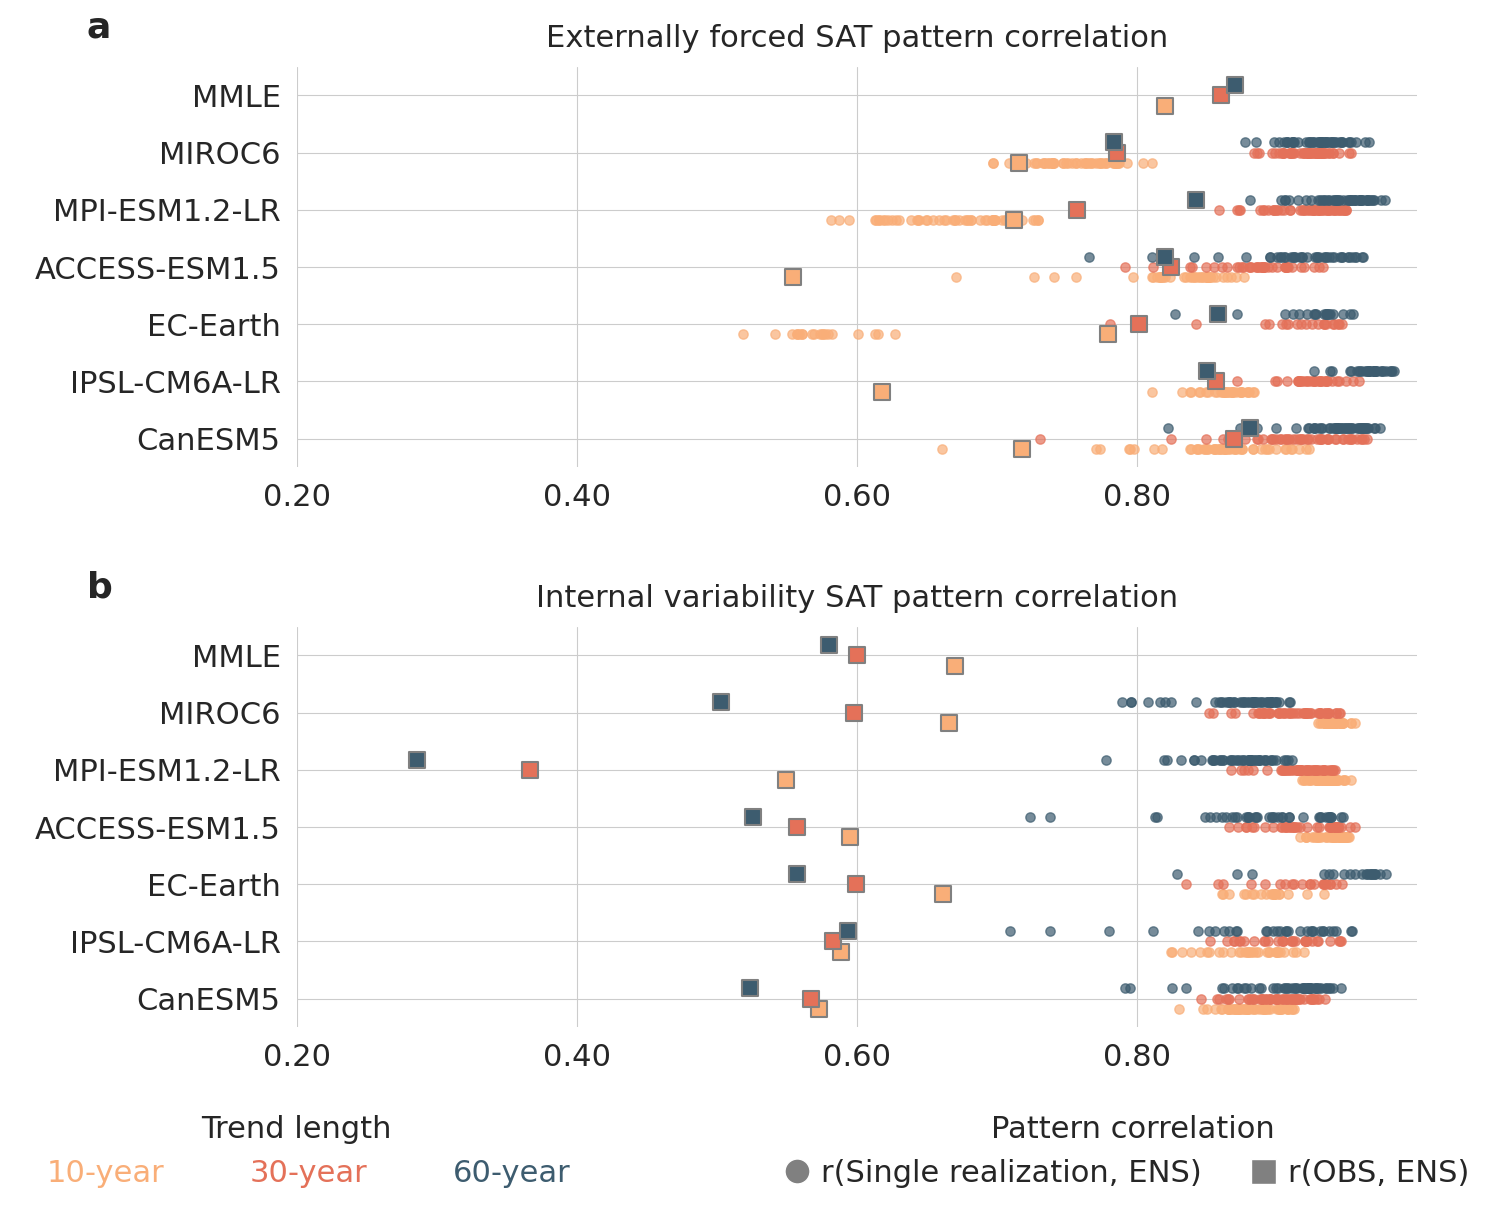

In [38]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set_style("whitegrid")
# sns.set_context("talk")
# sns.set_palette("colorblind")
"""
plot the two subplots in one figure
"""
model_palette = {
    'MMEM': ['#F9AE78','#E47159', '#3D5C6F'],
    'CanESM5': ['#F9AE78','#E47159', '#3D5C6F'],   
    'IPSL': ['#F9AE78','#E47159', '#3D5C6F'], 
    'EC-Earth': ['#F9AE78','#E47159', '#3D5C6F'], 
    'ACCESS': ['#F9AE78','#E47159', '#3D5C6F'],    
    'MPI-ESM': ['#F9AE78','#E47159', '#3D5C6F'],   
    'MIROC6': ['#F9AE78','#E47159', '#3D5C6F'], 
}

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(16, 12))
# fig = plt.figure(figsize=(20, 15))
# gs = gridspec.GridSpec(2, 1, wspace=0.15)

# axs[0] = plt.subplot(gs[0, 0])
# axs[1] = plt.subplot(gs[1, 0])

models_position = ['CanESM5', 'IPSL', 'EC-Earth', 'ACCESS', 'MPI-ESM', 'MIROC6', 'MMEM']
sns.despine(bottom=True, left=True)

for i, (model_name, model_correlations) in enumerate(models_data.items()):
    if i == 6:
        # Add MMEM horizontal lines
        for j, time_period in enumerate(time_periods):
            mmem_value = MMEM_corr[time_period]  # Get the MMEM value for the current time period
            y_position = i + (j - 1) * 0.18  # Adjust for time period
            # Draw the vertical line for the MMEM value at the correct x-position
            axs[0].scatter(mmem_value, y_position, color=model_palette[model_name][j], label='' if i == 0 else "", alpha=1.0, s=125, marker='s', 
                       edgecolors='gray', linewidth=1.5)
            # ax.scatter(mmem_value, y_position, color=model_palette[model_name][j], label='' if i == 0 else "", alpha=1.0, s=400, marker='|', 
            #            edgecolors='gray', linewidth=1.5)
    else:
        for j, time_period in enumerate(time_periods):
            correlations = model_correlations[time_period]
            y_positions = [i + (j - 1) * 0.18 for _ in correlations]
        
            axs[0].scatter(correlations, y_positions, color=model_palette[model_name][j], label=f'{time_period}'+'-forced' if i == 0 else "", alpha=0.70, s=45)
            # Calculate box statistics
            q25 = np.percentile(correlations, 25)
            q50 = np.percentile(correlations, 50)
            q75 = np.percentile(correlations, 75)
            q05 = np.percentile(correlations, 5)
            q95 = np.percentile(correlations, 95)

            y_center = y_positions[0]

            # Adjust box width and color
            box_height = 0.28
            # axs[0].add_patch(plt.Rectangle((q25, y_center - box_height / 2), q75 - q25, box_height,
            #                             facecolor=model_palette[model_name][j], edgecolor='black', linewidth=1.5, alpha=0.3))

            # # Median line
            # axs[0].plot([q50, q50], [y_center - box_height / 2, y_center + box_height / 2], color='black', linewidth=1.5)

            # # Whiskers
            # axs[0].plot([q05, q25], [y_center, y_center], color='black', linewidth=1)
            # axs[0].plot([q75, q95], [y_center, y_center], color='black', linewidth=1)

# Add ensemble mean correlation values with larger hollow circles
for i, time_period in enumerate(time_periods):
    for j, model_name in enumerate(models_position):
        if model_name == 'MMEM':
            continue
        ensemble_mean_corr = ensemble_data[model_name][time_period]
        y_position = j + (i - 1) * 0.18
        axs[0].scatter(ensemble_mean_corr, y_position,  color=model_palette[model_name][i],label=f'{time_period}'+'-ensemble mean' if j == 0 else "", 
                   alpha=1.0, s=125, linewidth=1.5, marker='s', edgecolor='gray')
        # add box-and-whisker plot for the ensemble mean correlation
for i, (model_name, model_correlations) in enumerate(models_unforced_data.items()):
    if i == 6:
        # Add MMEM horizontal lines
        for j, time_period in enumerate(time_periods):
            mmem_value = MMEM_unforced_corr[time_period]  # Get the MMEM value for the current time period
            y_position = i + (j - 1) * 0.18  # Adjust for time period
            # Draw the vertical line for the MMEM value at the correct x-position
            axs[1].scatter(mmem_value, y_position, color=model_palette[model_name][j], label='' if i == 0 else "", alpha=1.0, s=125, marker='s', 
                       edgecolors='gray', linewidth=1.5)
    else:
        for j, time_period in enumerate(time_periods):
            correlations = model_correlations[time_period]
            y_positions = [i + (j - 1) * 0.18 for _ in correlations]
        
            axs[1].scatter(correlations, y_positions, color=model_palette[model_name][j], label=f'{time_period}' if i == 0 else "", alpha=0.70, s=45)
            # Calculate box statistics
            q25 = np.percentile(correlations, 25)
            q50 = np.percentile(correlations, 50)
            q75 = np.percentile(correlations, 75)
            q05 = np.percentile(correlations, 5)
            q95 = np.percentile(correlations, 95)

            # axs[1].add_patch(plt.Rectangle((q25, y_positions[0] - 0.05), q75 - q25, 0.1,
            #                             facecolor='none', edgecolor='black', linewidth=1.5))

            # axs[1].plot([q50, q50], [y_positions[0] - 0.05, y_positions[0] + 0.05],
            #             color='black', linewidth=1.5)

            # axs[1].plot([q05, q25], [y_positions[0], y_positions[0]], color='black', linewidth=1)
            # axs[1].plot([q75, q95], [y_positions[0], y_positions[0]], color='black', linewidth=1)

# Add ensemble mean correlation values with larger hollow circles
for i, time_period in enumerate(time_periods):
    for j, model_name in enumerate(models_position):
        if model_name == 'MMEM':
            continue
        ensemble_mean_corr = ensemble_unforced_data[model_name][time_period]
        y_position = j + (i - 1) * 0.18
        axs[1].scatter(ensemble_mean_corr, y_position,  color=model_palette[model_name][i], 
                   alpha=1.0, s=125, linewidth=1.5, marker='s', edgecolor='gray')

y_labels = ['CanESM5', 'IPSL-CM6A-LR', 'EC-Earth', 'ACCESS-ESM1.5', 'MPI-ESM1.2-LR', 'MIROC6', 'MMLE']
# ax.set_yticklabels(y_labels, fontsize=20) 
axs[0].set_yticks(range(len(models_position)))
axs[0].set_yticklabels(y_labels, fontsize=22)

# ax.margins(x=0.5,y=-0.25)fontweight='bold'
axs[0].set_xlim(0.2, 1.0)
axs[0].set_xticks(np.arange(0.2, 1.0, 0.2))
axs[0].set_xticklabels([f'{i:.2f}' for i in np.arange(0.2, 1.0, 0.2)], fontsize=22)
# axs[0]=plt.xlabel('Human forced SAT pattern correlation', fontsize=22, labelpad=20)
# add the vertical line of the correlation value of 0.5
# ax.axvline(x=0.7, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# ax.axvline(x=0.9, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)

axs[0].text(0.05, 7.2, 'a', fontsize=26, fontweight='bold', ha='left', va='center')
axs[0].text(0.6, 6.85, 'Externally forced SAT pattern correlation', fontsize=22, ha='center')
# subplots b
axs[1].set_yticks(range(len(models_position)))
axs[1].set_yticklabels(y_labels, fontsize=22)

axs[1].set_xlim(0.2, 1.0)
axs[1].set_xticks(np.arange(0.2, 1.0, 0.2))
axs[1].set_xticklabels([f'{i:.2f}' for i in np.arange(0.2, 1.0, 0.2)], fontsize=22)
# axs[1].xlabel('Internal variability SAT pattern correlation', fontsize=22, labelpad=20)

# add the vertical line of the correlation value of 0.5
# axs[1].axvline(x=0.7, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# axs[1].axvline(x=0.9, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# Add text to the left corner of the plot
axs[1].text(0.05, 7.2, 'b', fontsize=26, fontweight='bold', ha='left', va='center')
axs[1].text(0.6, 6.85, 'Internal variability SAT pattern correlation', fontsize=22, ha='center')

# add the legend to whole figure
"""
the legend designed as the following:
    2 Rows and 1 Columns
    1. lengend for the time period: title = 'Trend length' text shows in corresponding color of dots
    2. legend for the shapes: title = 'Pattern correlation' 
"dots" stands for the pattern correlation of the model single realization .vs. ensemble mean
"squares" stands for the pattern correlation of the r(observed, modeled ensemble mean)
    
"""
# Create a custom legend
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


# legend_elements_pattern = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='r(Single realization, Ensemble mean)'),
#                            Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=10, label='r(Observed, Ensemble mean)')]

# # Add the first legend for the time periods
# fig.legend(handles=legend_elements_time, loc='upper center', fontsize=16, title="Trend length", title_fontsize='13', ncol=3, bbox_to_anchor=(0.5, 0.05))

# # Add the second legend for the pattern correlation types
# fig.legend(handles=legend_elements_pattern, loc='upper right', fontsize=16, title="Pattern correlation", title_fontsize='13', bbox_to_anchor=(0.95, 0.05))

legend_elements_pattern = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=18, label='r(Single realization, ENS)'),
                           Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', markersize=18, label='r(OBS, ENS)')]

# Add the first legend for the pattern correlation types
fig.legend(handles=legend_elements_pattern, loc='upper right', fontsize=22, title="Pattern correlation", title_fontsize='22', 
           ncol = 2, bbox_to_anchor=(0.95, 0.1))

legend_elements_time = [Line2D([0], [0], color=model_palette['MMEM'][0], lw=0, label='10-year'),
                   Line2D([0], [0], color=model_palette['MMEM'][1], lw=0, label='30-year'),
                   Line2D([0], [0], color=model_palette['MMEM'][2], lw=0, label='60-year')]
# Add the second legend list text with corresponding color
fig.legend(handles=legend_elements_time, loc='upper center', fontsize=22, title="Trend length", 
           title_fontsize='22', ncol=3, labelcolor='linecolor', bbox_to_anchor=(0.2, 0.1))

# plt.tight_layout(pad=1.0)
fig.subplots_adjust(top=0.95, bottom=0.15, left=0.2, right=0.9, hspace=0.4, wspace=0.25)
fig.savefig('Extended_Fig9_distribution_Pcorr.png', dpi=300)
fig.savefig('Extended_Fig9_distribution_Pcorr.eps', format='eps', dpi=300)
fig.savefig('Extended_Fig9_distribution_Pcorr.pdf', format='pdf', dpi=300,transparent=True)

plt.show()

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
# sns.set_context("talk")
# sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(15, 8))

sns.despine(bottom=True, left=True)

models_position = ['CanESM5', 'IPSL', 'EC_Earth', 'ACCESS', 'MPI_ESM', 'MIROC6', 'MMEM']

for i, (model_name, model_correlations) in enumerate(models_unforced_data.items()):
    if i == 6:
        # Add MMEM horizontal lines
        for j, time_period in enumerate(time_periods):
            mmem_value = MMEM_unforced_corr[time_period]  # Get the MMEM value for the current time period
            y_position = i + (j - 1) * 0.18  # Adjust for time period
            # Draw the vertical line for the MMEM value at the correct x-position
            ax.scatter(mmem_value, y_position, color=model_palette[model_name][j], label='' if i == 0 else "", alpha=1.0, s=250, marker='s', 
                       edgecolors='gray', linewidth=1.5)
    else:
        for j, time_period in enumerate(time_periods):
            correlations = model_correlations[time_period]
            y_positions = [i + (j - 1) * 0.18 for _ in correlations]
        
            ax.scatter(correlations, y_positions, color=model_palette[model_name][j], label=f'{time_period}'+'-unforced' if i == 0 else "", alpha=0.70, s=65)

# Add ensemble mean correlation values with larger hollow circles
for i, time_period in enumerate(time_periods):
    for j, model_name in enumerate(models_position):
        if model_name == 'MMEM':
            continue
        ensemble_mean_corr = merged_unforced_data[time_period][j]
        y_position = j + (i - 1) * 0.18
        ax.scatter(ensemble_mean_corr, y_position,  color=model_palette[model_name][i],label=f'{time_period}'+'-unforced stddev.' if j == 0 else "", 
                   alpha=1.0, s=250, linewidth=1.5, marker='s', edgecolor='gray')


y_labels = ['CanESM5', 'IPSL-CM6A-LR', 'EC-Earth', 'ACCESS-ESM1.5', 'MPI-ESM1.2(LR)', 'MIROC6', 'MMEM']
# ax.set_yticklabels(y_labels, fontsize=20) 
ax.set_yticks(range(len(models_position)))
ax.set_yticklabels(y_labels, fontsize=22)

# ax.set_ylabel('Model', fontsize=20)
# set the legend for the time period to the top left corner
# legend=ax.legend(title='', loc='upper right', fontsize=20, ncol=1,bbox_to_anchor=(1.5, 1.05))
# legend.get_frame().set_alpha(0)

# fig_legend = plt.figure(figsize=(5,5))
# ax_legend = fig_legend.add_subplot(111)
# ax_legend.axis('off')
# ax_legend.legend(*ax.get_legend_handles_labels(), title='', loc='center', fontsize=20, ncol=1)

# fig_legend.savefig('legend.png', dpi=300, transparent=True)
# fig_legend.savefig('legend.eps', format='eps', dpi=300, transparent=True)

# plt.colse(fig_legend)

# ax.margins(x=0.5,y=-0.25)fontweight='bold'
ax.set_xlim(-0.8, 0.8)
ax.set_xticks(np.arange(-0.8, 0.8, 0.2))
ax.set_xticklabels([f'{i:.2f}' for i in np.arange(-0.8, 0.8, 0.2)], fontsize=22)

# add the vertical line of the correlation value of 0.5
# ax.axvline(x=0.7, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# ax.axvline(x=0.9, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# Add text to the left corner of the plot
ax.text(-1.16, 7.2, 'b', fontsize=26, fontweight='bold', ha='left', va='center')
ax.text(0.15, 7.2, 'Human forced SAT pattern correlation', fontsize=24, ha='left')

# Display the plot
fig.tight_layout()
plt.savefig('Figure2b.png', dpi=300, transparent=True)
plt.savefig('Figure2b.eps', format='eps', dpi=300, transparent=True)
plt.show()

In [ ]:
# output the legend of the figure as a separate figure
fig, ax = plt.subplots(figsize=(15, 8))

# Add the legend
for i, time_period in enumerate(time_periods):
    ax.scatter(0, i, color='gray', label=f'{time_period}', alpha=1.0, s=250, marker='s', edgecolors='gray', linewidth=1.5)
    
 

In [ ]:
# # plot the subplot b
# fig, ax = plt.subplots(figsize=(15, 8))

# for i, (model_name, model_correlations) in enumerate(models_unforced_data):
#     for j, time_period in enumerate(time_periods):
#         correlations = model_correlations[time_period]
#         y_positions = [i + (j - 1) * 0.15 for _ in correlations]  # Adjust the y-position for each time period
#         ax.scatter(correlations, y_positions, color=model_palette[model_name][j], label=f'{time_period}' if i == 0 else "", alpha=0.80, s=75)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # Formatting the plot
# ax.set_yticks(models_position)
# # specify the yticks labels
# y_labels = ['CanESM5(50)', 'IPSL(32)', 'EC_Earth(21)', 'ACCESS(40)', 'MPI_ESM(50)', 'MIROC6(50)']
# ax.set_yticklabels(y_labels, fontsize=20) 
# plt.xlabel('Global SAT Trend Pattern Correlation', fontsize=22, labelpad=20)
# # ax.margins(x=0.5,y=-0.25)
# ax.set_xlim(-0.8, 0.8)
# ax.set_xticks(np.arange(-0.8, 0.8, 0.2))
# ax.set_xticklabels([f'{i:.2f}' for i in np.arange(-0.8, 0.8, 0.2)], fontsize=22)
# ax.set_ylim(-0.5, len(models_data))
# # ax.set_title('a.Single realization forced pattern vs. SMILEs ensemble pattern', 
# #              fontsize=24, fontweight='bold', loc='left', pad=20)

# # add the vertical line of the correlation value of 0.5
# ax.axvline(x=0.0, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# # ax.axvline(x=0.8, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# # Add text to the left corner of the plot
# ax.text(-1.12, 6.2, 'c', fontsize=28, fontweight='bold', ha='left', va='center')
# ax.text(-0.91, 6.2, 'Single realization unforced pattern vs. OBS'+ r'$_{wrt.SMILE} $'+ 'unforced pattern', 
#         fontsize=24, ha='left', va='center')

# # Display the plot
# fig.tight_layout()
# plt.savefig('Figure4c-pattern_correlation_single_realization_unforced_vs_obs_unforced.png', dpi=300, transparent=True)
# plt.show()
